# Exploratory data analysis of the Madrid dataset

Dataset can be found on https://www.kaggle.com/datasets/kevsde/madrid-house-price.

In [1]:
import pandas as pd
import numpy as np 
import matplotlib.pyplot as plt
import seaborn as sns
from tqdm import tqdm

In [68]:
# Colorblind-friendly colors
colors = sns.color_palette("colorblind", 10)
sns.set_palette("colorblind")

### Data loading and basic statistics

In [3]:
data = pd.read_csv('../data/madrid_houses_oct2022.csv')

# Show first rows
data.head()

,price,house_type,house_type_2,rooms,m2,elevator,garage,neighborhood,district
0,495000,planta 1,exterior,3,118.0,True,True,Chopera,Arganzuela
1,485000,planta 2,exterior,2,82.0,True,True,Palos de Moguer,Arganzuela
2,315000,planta 2,exterior,2,72.0,False,False,Legazpi,Arganzuela
3,585000,planta 4,exterior,2,174.0,True,True,Palos de Moguer,Arganzuela
4,255000,bajo,exterior,3,75.0,False,False,Acacias,Arganzuela


In [4]:
# Display key properties
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 15975 entries, 0 to 15974
Data columns (total 9 columns):
 #   Column        Non-Null Count  Dtype  
---  ------        --------------  -----  
 0   price         15975 non-null  int64  
 1   house_type    15975 non-null  object 
 2   house_type_2  15506 non-null  object 
 3   rooms         15975 non-null  int64  
 4   m2            15975 non-null  float64
 5   elevator      15975 non-null  bool   
 6   garage        15975 non-null  bool   
 7   neighborhood  15975 non-null  object 
 8   district      15975 non-null  object 
dtypes: bool(2), float64(1), int64(2), object(4)
memory usage: 905.0+ KB


In [5]:
# Inspect types of 'object' columns
print(f" Type of 'house_type' variable : {type(data['house_type'][0])}\n", 
      f"Type of 'house_type_2' variable : {type(data['house_type_2'][0])}\n", 
      f"Type of 'neighborhood' variable : {type(data['neighborhood'][0])}\n", 
      f"Type of 'district' variable : {type(data['district'][0])}")

 Type of 'house_type' variable : <class 'str'>
 Type of 'house_type_2' variable : <class 'str'>
 Type of 'neighborhood' variable : <class 'str'>
 Type of 'district' variable : <class 'str'>


From the above and the description of the dataset on Kaggle, we have :
* *price* (integer) : price of the house/flat
* *house_type* (string) : second floor, third floor, ...
* *house_type_2* (string) : interior or exterior
* *rooms* (integer) : number of rooms
* *m2* (float) : area in square meters
* *elevator* (boolean) : True or False
* *garage* (boolean) : True or False
* *district* (string) : one of the 21 Madrid's districts
* *neighborhood* (string) : a Madrid neighborhood

In [6]:
# Check unique values for each feature
print(f'Number of different values (on {len(data)} samples): \n\n{data.nunique()}')

Number of different values (on 15975 samples): 

price           2001
house_type        26
house_type_2       2
rooms             18
m2               585
elevator           2
garage             2
neighborhood     341
district          21
dtype: int64


In [7]:
# Check missing entries
print(f'Number of missing values : \n\n{data.isnull().sum()}')

Number of missing values : 

price             0
house_type        0
house_type_2    469
rooms             0
m2                0
elevator          0
garage            0
neighborhood      0
district          0
dtype: int64


In [8]:
# Check duplicates
print(f'Number of duplicated rows : {data.duplicated().sum()}')

Number of duplicated rows : 1717


In [9]:
data.describe()

,price,rooms,m2
count,1.597500e+04,15975.000000,15975.000000
mean,6.242327e+05,2.847762,124.807398
std,7.709074e+05,1.360926,101.705064
min,7.250000e+02,1.000000,1.000000
25%,1.950000e+05,2.000000,66.000000
50%,3.599730e+05,3.000000,93.000000
75%,7.490000e+05,3.000000,142.000000
max,1.395000e+07,41.000000,989.000000


#### Summary : 
* 15975-1717 = **14258 different samples** in total
* **9 features** with different types : integers, floats, strings and booleans
* Very few **missing entries** (**469** for 'house_type_2' column, **0** for all the others)
* Maybe some **outliers** (from the table above : 725€ and 1m² seems very low for an accommodation)

### Data cleaning

First, we remove duplicated samples and fill-in missing entries in *house_type_2* with the majority value :

In [10]:
data.drop_duplicates(inplace=True)
data['house_type_2'] = data['house_type_2'].fillna(data['house_type_2'].mode()[0])

In [11]:
print(f'Number of samples : {len(data)}')

Number of samples : 14258


Then, we need to clean a bit the *neighborhood* feature. Indeed, with a quick web search you can find that there are 131 neighborhoods ("barrios") in Madrid, which does not match the number of unique values that we have for this variable (341). This is because of an undesired prefix in front of the actual neighborhood for lots of examples in the dataset. We can inspect these examples to try understanding the pattern that they follow :

In [23]:
# Look for longest examples to identify examples with prefixes
longest_neighborhoods = data['neighborhood'].drop_duplicates().apply(len).sort_values(ascending=False).head(50)
data.loc[longest_neighborhoods.index, 'neighborhood']

800      Casa o chalet independiente en Casco Histórico...
4847     Casa o chalet independiente en Bernabéu-Hispan...
8179     Casa o chalet independiente en Tres Olivos - V...
10314    Casa o chalet independiente en Ciudad Universi...
629      Chalet pareado en Campo de las Naciones-Corral...
8829     Casa o chalet independiente en Conde Orgaz-Pio...
701      Chalet adosado en Campo de las Naciones-Corral...
15884       Casa o chalet independiente en Villaverde Alto
8152         Casa o chalet independiente en Fuentelarreina
10311         Casa o chalet independiente en Casa de Campo
9024           Chalet adosado en Valdebebas - Valdefuentes
8886           Chalet pareado en Valdebebas - Valdefuentes
4791           Casa o chalet independiente en Nueva España
2632           Casa o chalet independiente en Vista Alegre
5772             Chalet pareado en Bernabéu-Hispanoamérica
5709             Chalet adosado en Bernabéu-Hispanoamérica
1335             Casa o chalet independiente en Guindale

We observe that all the samples concerned have the word "en" before the name of the neighborhood. So we can solve the problem by simply applying string manipulation techniques :

In [27]:
data['neighborhood'] = data['neighborhood'].str.replace(r'^.*en ', '', regex=True)
print(f'Number of different neighborhoods : {len(data['neighborhood'].unique())}')

Number of different neighborhoods : 136


We get a much more consistent number of unique values. Further work will be necessary in the future to make sure that all these values correspond to a real Madrid neighborhood.

Now, we look for potentially unnecessary attributes. Our main focus in this project is on property values and neighborhoods patterns in the cities, so we already know that price, size-related and geographical features could be useful. For the other ones, we can do a simple correlation analysis to assess their relevance :

In [28]:
features_to_check = ['house_type', 'house_type_2', 'elevator', 'garage']
encoded_features = pd.get_dummies(data[features_to_check]) # all these attributes are categorical so we need hot-encode them

# Check correlation with the 'price' feature
print(f'Correlation with price : \n\n{encoded_features.corrwith(data['price'])}')

Correlation with price : 

elevator                  0.157148
garage                    0.253841
house_type_bajo          -0.149283
house_type_casa           0.123541
house_type_chalet         0.279579
house_type_entreplanta   -0.017210
house_type_planta -1     -0.015784
house_type_planta 1      -0.070261
house_type_planta 10     -0.003030
house_type_planta 11     -0.004460
house_type_planta 12      0.020063
house_type_planta 13      0.002467
house_type_planta 14      0.007694
house_type_planta 15      0.013732
house_type_planta 16      0.033696
house_type_planta 18      0.009956
house_type_planta 19      0.024434
house_type_planta 2      -0.033551
house_type_planta 20      0.003317
house_type_planta 3      -0.021320
house_type_planta 4      -0.006120
house_type_planta 5       0.072835
house_type_planta 6       0.076041
house_type_planta 7       0.055306
house_type_planta 8       0.026356
house_type_planta 9       0.015059
house_type_semi-sotano   -0.029864
house_type_sotano        -0.

We observe poor correlation between *price* and *house_type*, *house_type_2*, *elevator*, *garage* features, which suggest that they are likely not very meaningful for our work. In particular, we can see that the floor number in a flat ("planta x", "bajo", "entreplanta", "(semi) sotano" in spanish) has a very low incidence. 

However, we know that correlation may fail to capture non-linear types of relationships. 

In order to keep data preprocessing safe, we will thus preserve all the variables for which the correlation value is always greater than 0.1 (i.e.  *house_type_2*, *elevator* and *garage*) and replace the *house_type* feature with a binary one taking either 'house' ("casa" or "chalet" in spanish)  or 'apartment' value.

In [29]:
data['house_type'] = data['house_type'].map(lambda x: 'house' if x in ['casa', 'chalet'] else 'apartment')

Finally, we address the problem of outliers. First by removing unrealistic samples where the area is less than 10 square meters and then by checking price values very far from the mean in our dataset :

In [32]:
print(f"There were {len(data[data['m2'] <= 10])} examples with 'm2'<=10")
data = data[data['m2'] > 10]

There were 40 examples with 'm2'<=10


In [46]:
high_price_outliers = data[data["price"] > data["price"].quantile(0.99)]
high_price_outliers.describe()

,price,rooms,m2
count,1.430000e+02,143.000000,143.000000
mean,5.170545e+06,5.524476,526.146853
std,1.626511e+06,2.145523,169.619996
min,3.700000e+06,2.000000,293.000000
25%,3.995000e+06,4.000000,400.000000
50%,4.500000e+06,5.000000,471.000000
75%,5.800000e+06,6.000000,655.000000
max,1.120000e+07,16.000000,989.000000


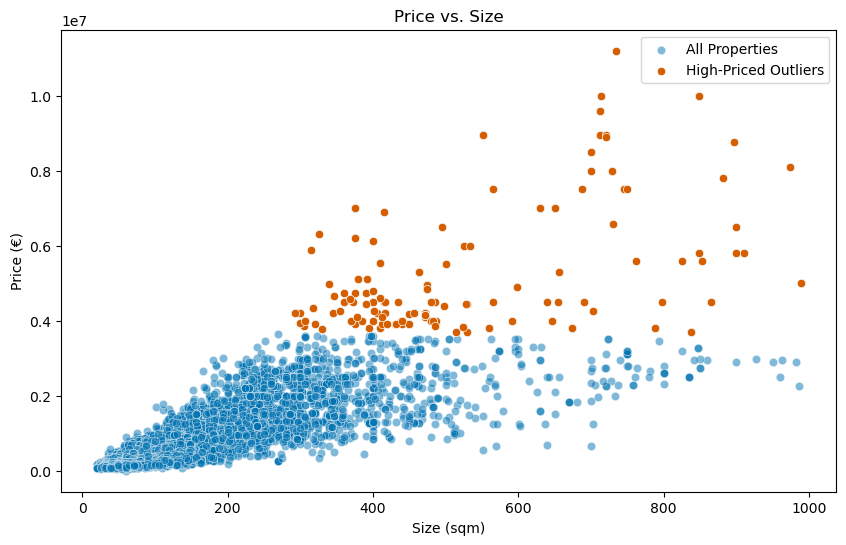

In [ ]:
# Visualize outliers
plt.figure(figsize=(10, 6))
sns.scatterplot(x=data['m2'], y=data['price'], alpha=0.5, label='All Properties')
sns.scatterplot(x=high_price_outliers['m2'], y=high_price_outliers['price'], color=colors[3], label='High-Priced Outliers')
plt.xlabel("Size (sqm)")
plt.ylabel("Price (€)")
plt.title("Price vs. Size")
plt.legend()
plt.show()

For the moment, it is difficult to say if these outliers are credible exceptions (e.g. luxury houses) or erroneous data points, as they kind of follow the tendance of the other samples. We will probably explore more in depth this for next time.

### Visualizations

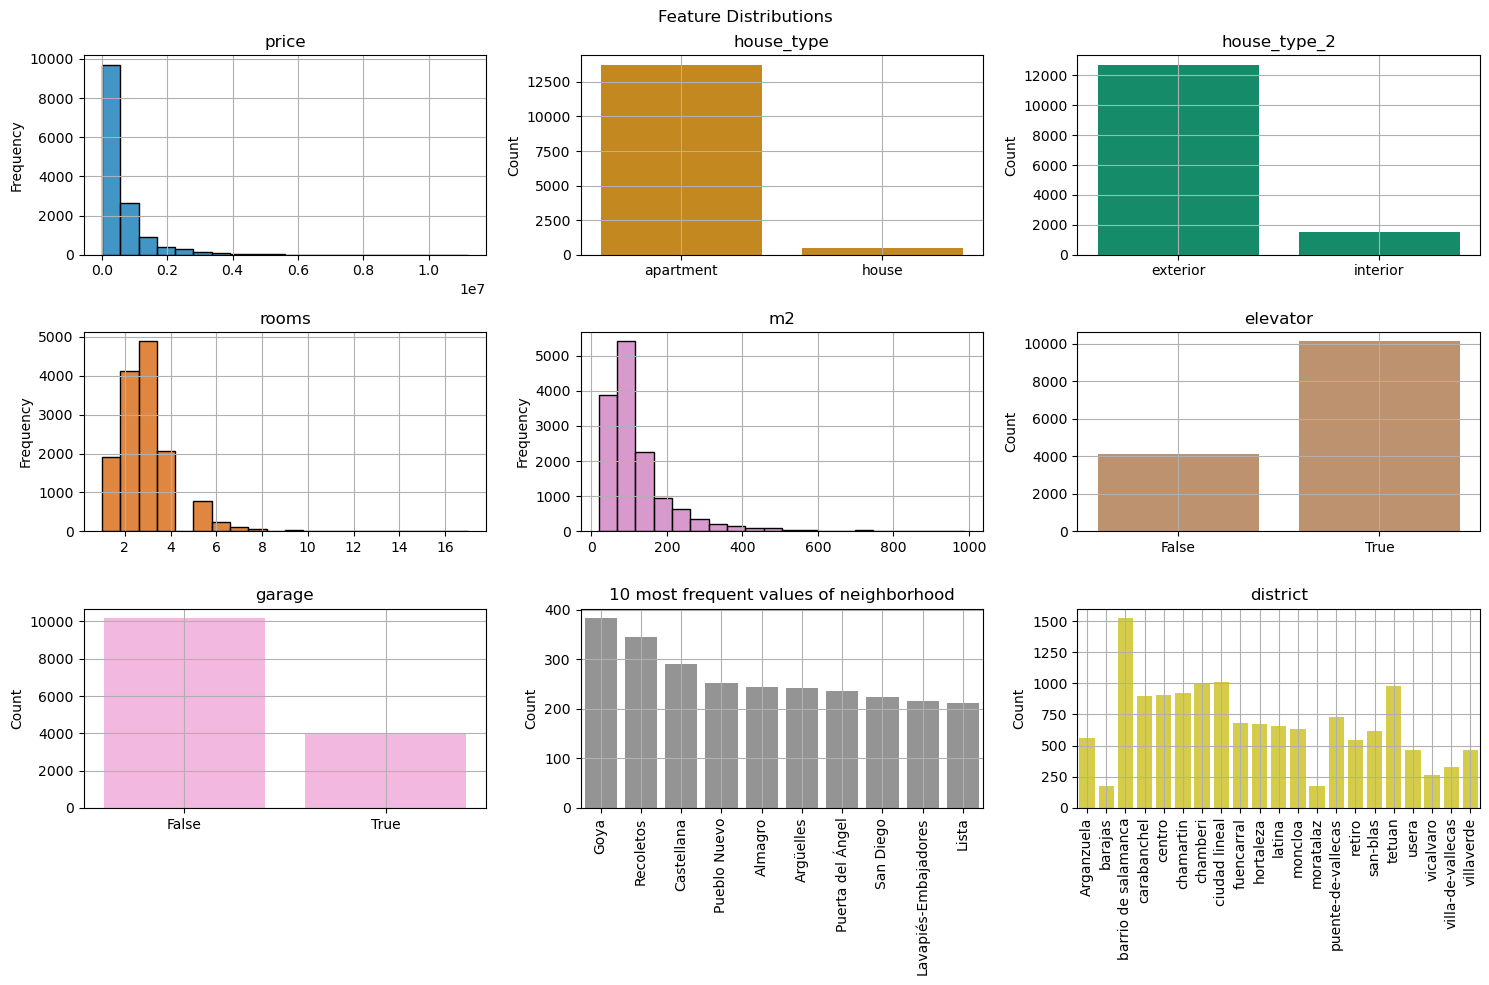

In [61]:
# Feature distributions

fig, axes = plt.subplots(3, 3, figsize=(15, 10))
axes = axes.flatten()

for i, feature in enumerate(data.columns):
    ax = axes[i]
    color = colors[i]
    
    # Histograms for int and float attributes
    if data[feature].dtype in [np.float64, np.int64]: 
        sns.histplot(data[feature], ax=ax, color=color, bins=20)
        ax.set_ylabel("Frequency")
        ax.set_title(feature)

    # Bar plot else
    else:  
        unique_values = data[feature].nunique()
        
        # Plot all if categories are not excessive, else plot top 10
        if unique_values <= 25:
            sns.countplot(x=data[feature], ax=ax, color=color)
            ax.set_title(feature)
        else:
            top_values = data[feature].value_counts().nlargest(10)
            sns.barplot(x=top_values.index, y=top_values.values, ax=ax, color=color)
            ax.set_title(f'10 most frequent values of {feature}')

        # Rotate x-ticks if many labels
        if unique_values > 2:
            ax.tick_params(axis='x', rotation=90)
        
        ax.set_ylabel("Count")

    ax.set_xlabel("")
    ax.grid(True)


# Add legend and title
fig.suptitle("Feature Distributions")
plt.tight_layout()
plt.show()

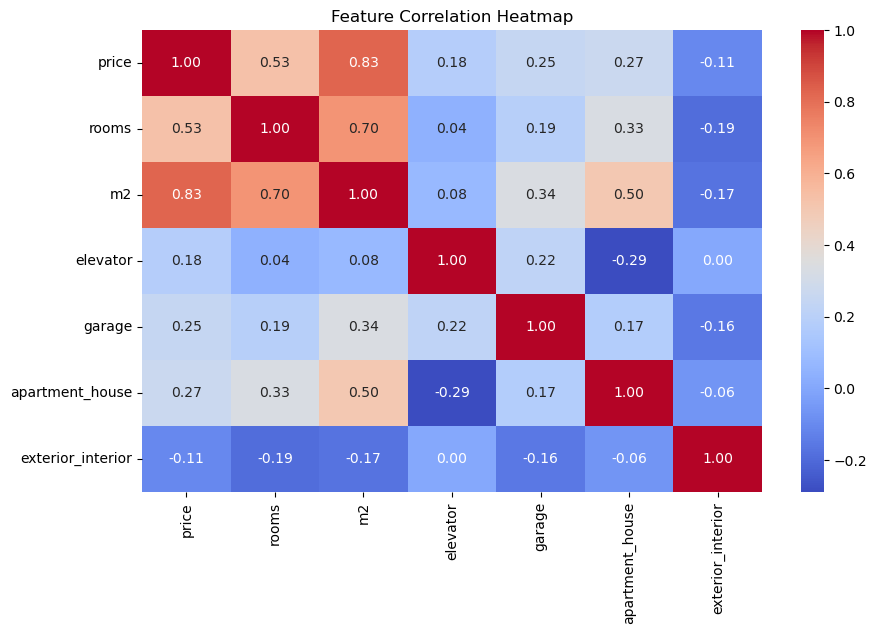

In [ ]:
# Heatmap for numeric and binary features
data_encoded = pd.get_dummies(data, columns=['house_type', 'house_type_2'], drop_first=True, prefix=['apartment', 'exterior'])
plt.figure(figsize=(10, 6))
sns.heatmap(data_encoded.drop(columns=['neighborhood', 'district']).corr(), annot=True, cmap='coolwarm', fmt='.2f')
plt.title(f'Feature Correlation Heatmap')
plt.show()

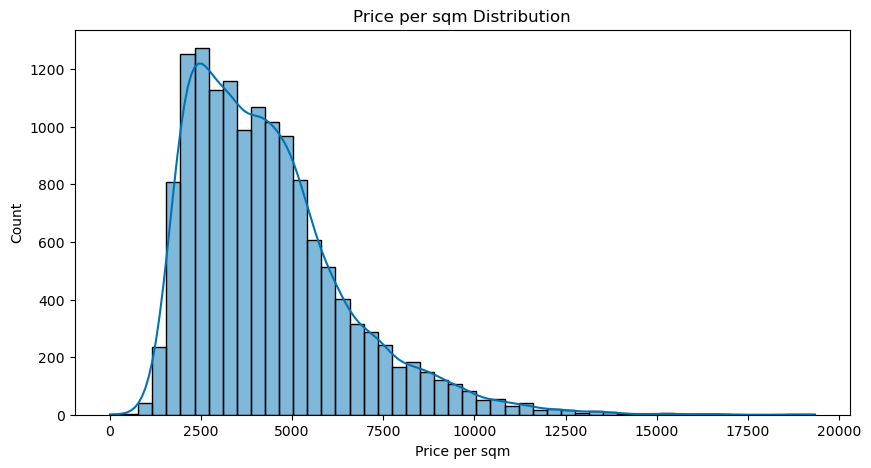

In [82]:
# We add an interesting feature that is a combination of already given ones (price per square meter) and visualize its distribution
data['price_per_sqm'] = data['price'] / data['m2']
plt.figure(figsize=(10, 5))
sns.histplot(data['price_per_sqm'], bins=50, kde=True)
plt.title(f'Price per sqm Distribution')
plt.xlabel('Price per sqm')
plt.ylabel('Count')
plt.show()
plt.show()

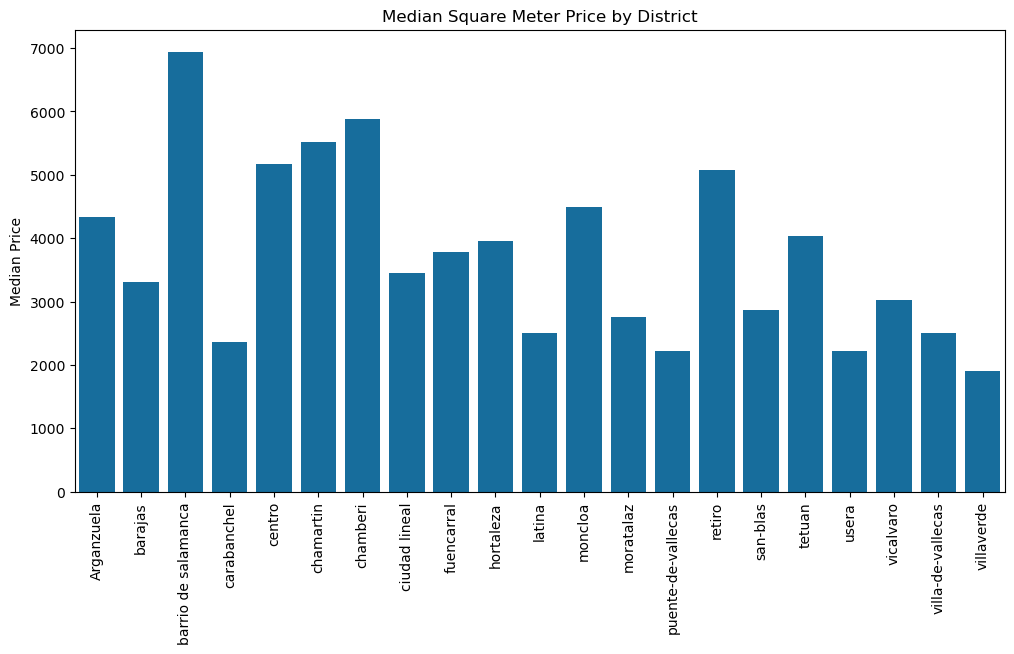

In [83]:
plt.figure(figsize=(12, 6))
sns.barplot(x=data.groupby('district')['price_per_sqm'].median().index, y=data.groupby('district')['price_per_sqm'].median().values)
plt.xticks(rotation=90)
plt.title(f'Median Square Meter Price by District')
plt.xlabel("")
plt.ylabel('Median Price')
plt.show()